In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## Configuração de Caminhos

Usamos `Path` da `pathlib` para construir caminhos de forma portável entre sistemas operacionais.

In [2]:
# Cria objeto Path para a pasta de dados
pasta_dados = Path('data')

# Cria caminho para subpasta 'raw' dentro de 'data'
pasta_dados_brutos = pasta_dados / 'raw'

# Exibe os caminhos criados
print(f"Caminhos:\n  Dados: {pasta_dados}\n  - Raw:   {pasta_dados_brutos}")


Caminhos:
  Dados: data
  - Raw:   data\raw


In [3]:
caminho_titanic_bruto = pasta_dados_brutos / 'titanic.csv' # caminho do arquivo
raw_df = pd.read_csv(caminho_titanic_bruto)
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Profiling Inicial do DataFrame

Análise exploratória rápida para entender estrutura, tipos e possíveis problemas nos dados.

In [4]:
# Informações básicas sobre o DataFrame
print("=== INFORMAÇÕES BÁSICAS ===")
print(f"Dimensões: {raw_df.shape}")
print(f"Total de registros: {len(raw_df)}")
print(f"Total de colunas: {len(raw_df.columns)}")
print(f"Memória usada: {raw_df.memory_usage(deep=True).sum() / 1024:.1f} KB")

=== INFORMAÇÕES BÁSICAS ===
Dimensões: (891, 12)
Total de registros: 891
Total de colunas: 12
Memória usada: 285.6 KB


In [5]:
# Tipos de dados por coluna
print("\n=== TIPOS DE DADOS ===")
print(raw_df.dtypes)


=== TIPOS DE DADOS ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Valores ausentes por coluna
print("\n=== VALORES AUSENTES ===")
valores_ausentes = raw_df.isnull().sum()
percentual_ausentes = (valores_ausentes / len(raw_df)) * 100

ausentes_df = pd.DataFrame({
    'Ausentes': valores_ausentes,
    'Percentual': percentual_ausentes.round(1)
})
print(ausentes_df[ausentes_df['Ausentes'] > 0])


=== VALORES AUSENTES ===
          Ausentes  Percentual
Age            177        19.9
Cabin          687        77.1
Embarked         2         0.2


In [7]:
# Estatísticas descritivas para colunas numéricas
print("\n=== ESTATÍSTICAS NUMÉRICAS ===")
raw_df.describe()


=== ESTATÍSTICAS NUMÉRICAS ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Valores únicos para colunas categóricas
print("\n=== VALORES ÚNICOS (CATEGÓRICAS) ===")
colunas_categoricas = raw_df.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:
    valores_unicos = raw_df[coluna].nunique()
    print(f"{coluna}: {valores_unicos} valores únicos")
    if valores_unicos <= 10:  # Mostra valores se poucos
        print(f"  → {list(raw_df[coluna].unique())}")
    print()


=== VALORES ÚNICOS (CATEGÓRICAS) ===
Name: 891 valores únicos

Sex: 2 valores únicos
  → ['male', 'female']

Ticket: 681 valores únicos

Cabin: 147 valores únicos

Embarked: 3 valores únicos
  → ['S', 'C', 'Q', nan]



In [9]:
# Verificação de registros duplicados
print("=== DUPLICATAS ===")
duplicatas = raw_df.duplicated().sum()
print(f"Registros duplicados: {duplicatas}")

if duplicatas > 0:
    print("Primeiras 5 duplicatas:")
    print(raw_df[raw_df.duplicated()].head())

=== DUPLICATAS ===
Registros duplicados: 0


## Visualizações Exploratórias

Gráficos simples para entender distribuições e padrões nos dados usando seaborn.

In [10]:
import seaborn as sns

# Configuração do estilo seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

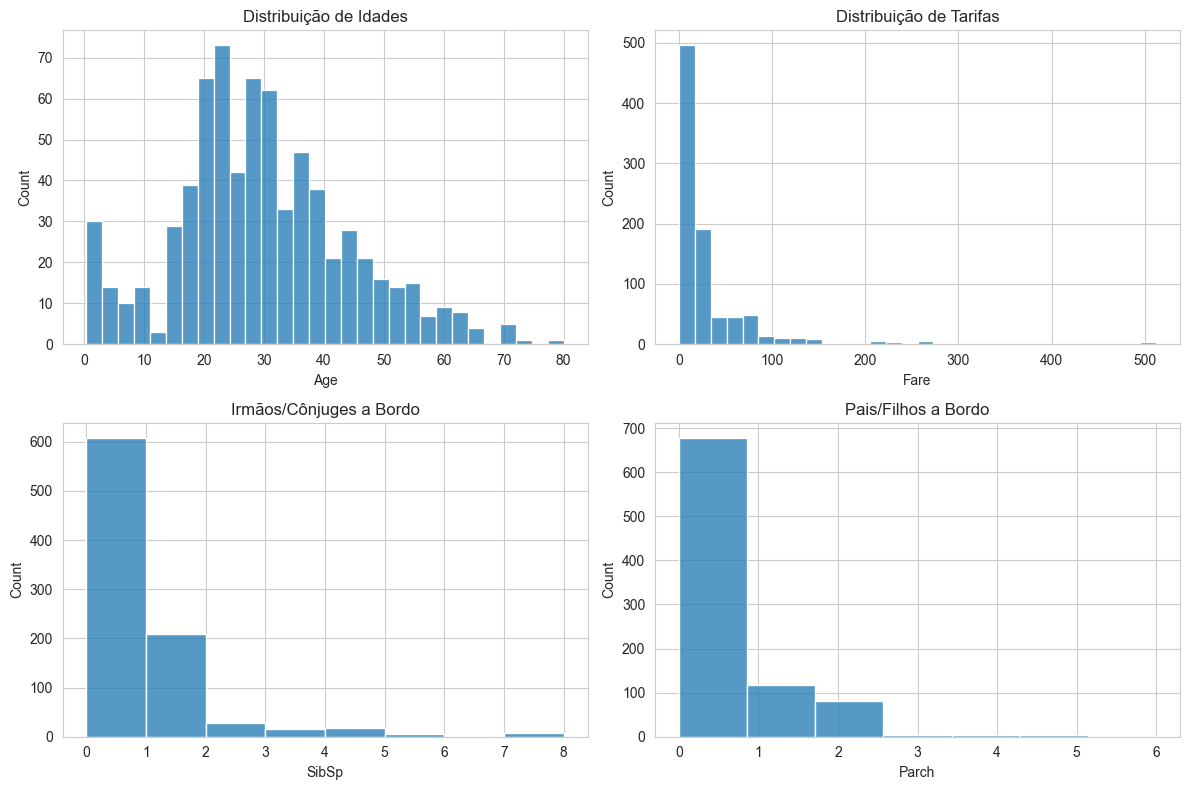

In [11]:
# Histogramas das variáveis numéricas com seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Age - distribuição de idades
sns.histplot(data=raw_df, x='Age', bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribuição de Idades')

# Fare - distribuição de tarifas
sns.histplot(data=raw_df, x='Fare', bins=30, ax=axes[0,1])
axes[0,1].set_title('Distribuição de Tarifas')

# SibSp - irmãos/cônjuges a bordo
sns.histplot(data=raw_df, x='SibSp', bins=8, ax=axes[1,0])
axes[1,0].set_title('Irmãos/Cônjuges a Bordo')

# Parch - pais/filhos a bordo
sns.histplot(data=raw_df, x='Parch', bins=7, ax=axes[1,1])
axes[1,1].set_title('Pais/Filhos a Bordo')

plt.tight_layout()
plt.show()

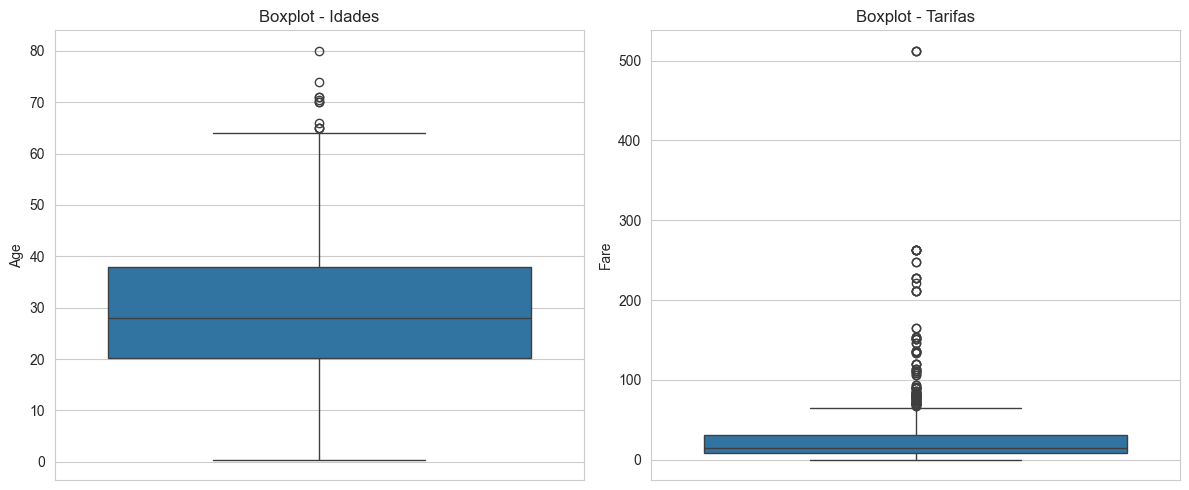

In [12]:
# Boxplots para detectar outliers com seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age - boxplot para outliers de idade
sns.boxplot(data=raw_df, y='Age', ax=axes[0])
axes[0].set_title('Boxplot - Idades')

# Fare - boxplot para outliers de tarifa
sns.boxplot(data=raw_df, y='Fare', ax=axes[1])
axes[1].set_title('Boxplot - Tarifas')

plt.tight_layout()
plt.show()

C:\Users\brunoritter\AppData\Local\Temp\ipykernel_31940\610270265.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['Não', 'Sim'])


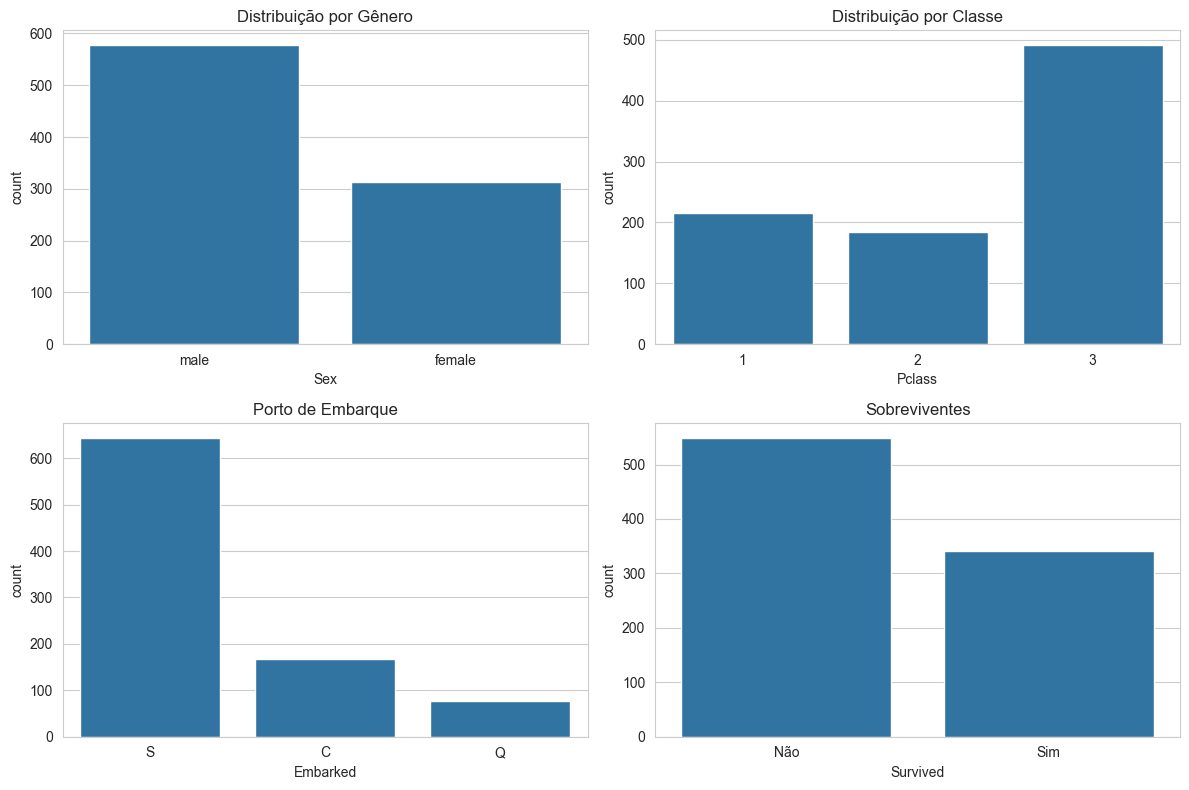

In [13]:
# Gráficos de contagem para variáveis categóricas com seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Sex - distribuição por gênero
sns.countplot(data=raw_df, x='Sex', ax=axes[0,0])
axes[0,0].set_title('Distribuição por Gênero')

# Pclass - distribuição por classe  
sns.countplot(data=raw_df, x='Pclass', ax=axes[0,1])
axes[0,1].set_title('Distribuição por Classe')

# Embarked - distribuição por porto de embarque
sns.countplot(data=raw_df, x='Embarked', ax=axes[1,0])
axes[1,0].set_title('Porto de Embarque')

# Survived - distribuição de sobreviventes
sns.countplot(data=raw_df, x='Survived', ax=axes[1,1])
axes[1,1].set_title('Sobreviventes')
axes[1,1].set_xticklabels(['Não', 'Sim'])

plt.tight_layout()
plt.show()

## 1. Preparação dos Dados para Modelagem

Separamos registros com idade conhecida (treino/teste) dos registros com idade ausente (predição futura).

In [14]:
# Separar registros com e sem idade conhecida
dados_com_idade = raw_df[raw_df['Age'].notna()].copy()
dados_sem_idade = raw_df[raw_df['Age'].isna()].copy()

print(f"Registros com idade: {len(dados_com_idade)}")
print(f"Registros sem idade: {len(dados_sem_idade)}")
print(f"Percentual sem idade: {len(dados_sem_idade) / len(raw_df) * 100:.1f}%")

Registros com idade: 714
Registros sem idade: 177
Percentual sem idade: 19.9%


### 1.1 Relação das Variáveis com Age

Antes de ajustar a Regressão Linear, exploramos como cada variável se relaciona com `Age` apenas nos registros onde a idade é conhecida (`dados_com_idade`).

Visualizações:
- Scatter plots das variáveis numéricas vs `Age` + correlações de Pearson.
- Boxplots de `Age` por variáveis categóricas (`Sex`, `Embarked`) e pela classe (`Pclass`, tratada como categórica).

Objetivo: identificar possíveis relações lineares, diferença de distribuição entre grupos e presença de outliers que possam influenciar o modelo.

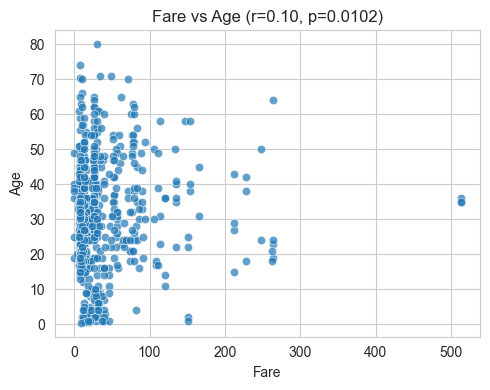

In [42]:
# Scatter plot de Fare vs Age + correlação de Pearson
from scipy.stats import pearsonr
var = 'Fare'
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(data=dados_com_idade, x=var, y='Age', alpha=0.7, ax=ax)
try:
    corr, pval = pearsonr(dados_com_idade[var], dados_com_idade['Age'])
    ax.set_title(f"{var} vs Age (r={corr:.2f}, p={pval:.3g})")
except Exception:
    ax.set_title(f"{var} vs Age")
plt.tight_layout()
plt.show()

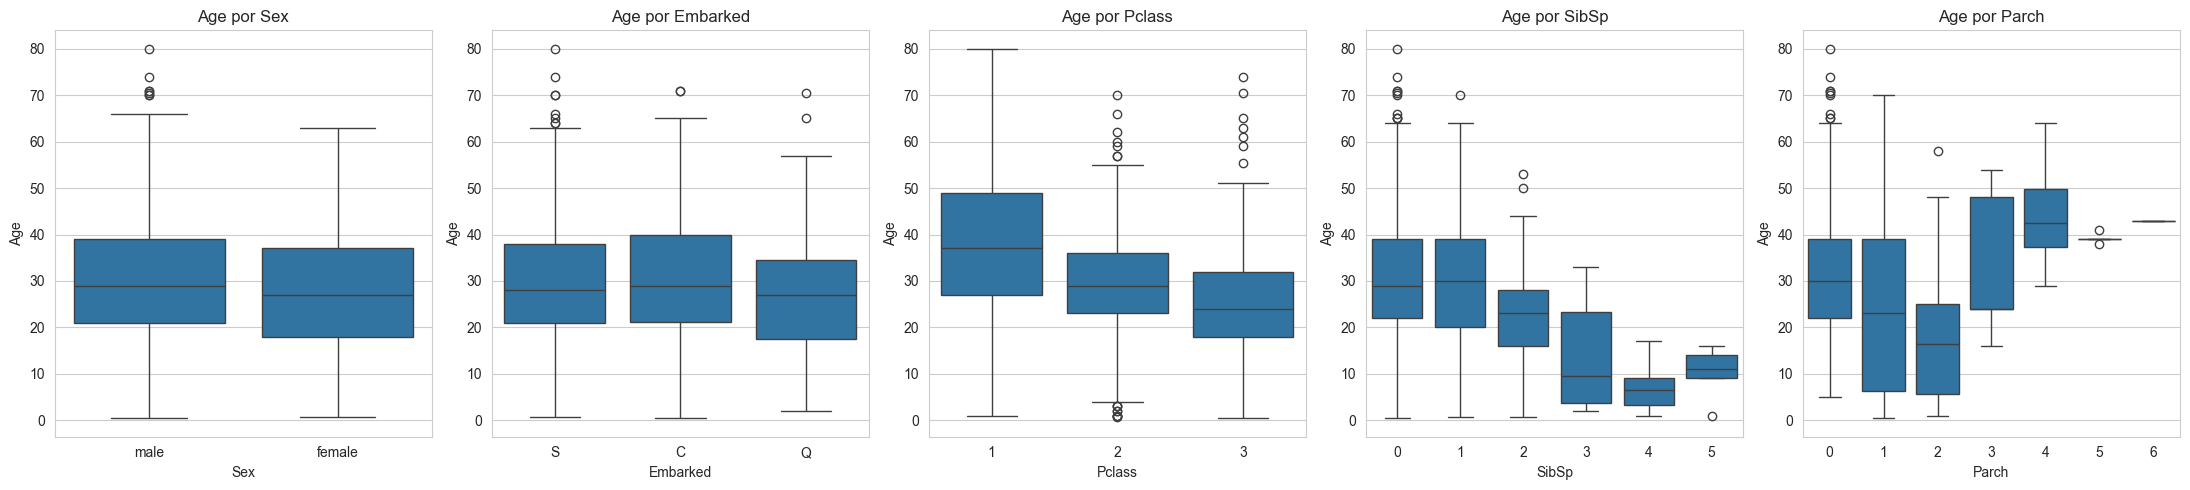

In [43]:
# Boxplots de Age por variáveis categóricas / discretas
fig, axes = plt.subplots(1, 5, figsize=(22, 5))

sns.boxplot(data=dados_com_idade, x='Sex', y='Age', ax=axes[0])
axes[0].set_title('Age por Sex')

sns.boxplot(data=dados_com_idade, x='Embarked', y='Age', ax=axes[1])
axes[1].set_title('Age por Embarked')

def discretizar(col):
    return col  # já são inteiros pequenos, mantemos como estão

sns.boxplot(data=dados_com_idade, x='Pclass', y='Age', ax=axes[2])
axes[2].set_title('Age por Pclass')

sns.boxplot(data=dados_com_idade, x='SibSp', y='Age', ax=axes[3])
axes[3].set_title('Age por SibSp')

sns.boxplot(data=dados_com_idade, x='Parch', y='Age', ax=axes[4])
axes[4].set_title('Age por Parch')

plt.tight_layout()
plt.show()

In [36]:
# Imports necessários para modelagem (sem LabelEncoder)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import statsmodels.api as sm  # Para métricas estatísticas (erros padrão, p-values, R² ajustado)

# Preparar dados básicos
dados_modelo = dados_com_idade.copy()
dados_modelo['Embarked'] = dados_modelo['Embarked'].fillna('S')
dados_modelo['Fare'] = dados_modelo['Fare'].fillna(dados_modelo['Fare'].median())

# Definir colunas (somente listas aqui; encoding será feito na seção de Regressão Linear)
colunas_categoricas = ['Sex', 'Embarked']
colunas_numericas = ['Pclass', 'SibSp', 'Parch', 'Fare']

print('Colunas numéricas:', colunas_numericas)
print('Colunas categóricas:', colunas_categoricas)

Colunas numéricas: ['Pclass', 'SibSp', 'Parch', 'Fare']
Colunas categóricas: ['Sex', 'Embarked']


## 2. Regressão Linear

Vamos prever a variável contínua `Age`. Antes precisamos transformar variáveis categóricas (`Sex`, `Embarked`) em números, pois a Regressão Linear não interpreta texto nem categorias nominalmente como números ordinais.

### Por que One-Hot Encoding?
Se apenas atribuíssemos números inteiros às categorias (ex: `male=0`, `female=1`) estaríamos impondo uma ordem e distância inexistentes. O One-Hot Encoding cria uma coluna binária para cada categoria, preservando a natureza nominal.

### Parâmetros importantes usados
- `sparse_output=False`: faz o encoder retornar um `numpy.ndarray` denso. Default é `True` (matriz esparsa). Como temos poucas categorias aqui, usar formato denso simplifica a concatenação e a visualização sem impacto de memória relevante.
- `drop='first'`: remove a primeira coluna dummy de cada variável categórica. Isso evita multicolinearidade perfeita ("armadilha das dummies") em modelos lineares, onde uma coluna seria combinação exata das demais + intercepto. Para modelos baseados em distância (como KNN) não é obrigatório, mas manter o mesmo formato facilita reutilizar a matriz.

### Passos na próxima célula
1. Ajustar (`fit`) e transformar (`transform`) categorias.  
2. Concatenar features numéricas e as colunas one-hot.  
3. Separar em treino e teste (hold-out 80/20).  
4. Exibir dimensões e nomes das features resultantes.

Isso estabelece a matriz de entrada base que alimentará primeiro a Regressão Linear e depois (reutilizando) o KNN.

In [37]:
# One-Hot Encoding (drop='first') e split treino/teste para Regressão Linear
# 1. Criamos o encoder especificando:
#    - sparse_output=False: saída densa (array) facilita concatenar e inspecionar.
#    - drop='first': remove uma dummy por variável categórica (evita multicolinearidade em Regressão Linear).
encoder = OneHotEncoder(sparse_output=False, drop='first')

# 2. Ajusta e transforma as colunas categóricas -> matriz binária
X_cat = encoder.fit_transform(dados_modelo[colunas_categoricas])

# 3. Extrai a matriz numérica original (já limpa)
X_num = dados_modelo[colunas_numericas].values

# 4. Concatena numéricas + categóricas codificadas
X_full = np.concatenate([X_num, X_cat], axis=1)

# 5. Guarda nomes das features para referência (útil em interpretação ou debugging)
nomes_features = colunas_numericas + encoder.get_feature_names_out(colunas_categoricas).tolist()

# 6. Define variável alvo
y = dados_modelo['Age']

# 7. Split em treino/teste (hold-out). Random_state fixo garante reprodutibilidade.
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

# 8. Feedback rápido das dimensões e nomes das features
print(f"X_treino: {X_treino.shape} | X_teste: {X_teste.shape}")
print('Features:', nomes_features)

X_treino: (571, 7) | X_teste: (143, 7)
Features: ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [ ]:
# Avaliação passo a passo da Regressão Linear (sem função para fins didáticos)
# Lista para guardar resultados (poderemos comparar depois com outros modelos)
resultados_regressao = []

print("=== REGRESSÃO LINEAR: BASELINE ===")

# 1. Instanciar o modelo (usa mínimos quadrados ordinários)
modelo_lr_baseline = LinearRegression()

# 2. Treinar (ajustar parâmetros) usando dados de treino
modelo_lr_baseline.fit(X_treino, y_treino)

# 3. Gerar previsões no conjunto de teste (dados nunca vistos pelo modelo)
predicoes = modelo_lr_baseline.predict(X_teste)

# 4. Calcular métricas de erro
mae = mean_absolute_error(y_teste, predicoes)              # Erro médio absoluto
rmse = np.sqrt(mean_squared_error(y_teste, predicoes))     # Raiz do erro quadrático médio

# 5. Registrar resultado para ranking posterior
resultados_regressao.append({
    'Experimento': 'RL 1 - Linear Regression (One-Hot drop first)',
    'Features': X_treino.shape[1],
    'MAE': mae,
    'RMSE': rmse
})

# 6. Exibir métricas básicas
print(f"RL 1 - Linear Regression (One-Hot drop first): MAE={mae:.2f}, RMSE={rmse:.2f}")

=== REGRESSÃO LINEAR: BASELINE ===
RL 1 - Linear Regression (One-Hot drop first): MAE=9.53, RMSE=11.76

--- Coeficientes (com erros padrão e p-values) ---
     Variavel  Coeficiente  Erro_Padrao  p_value
0  Intercepto      44.8353       2.5237   0.0000
1      Pclass      -7.5184       0.8499   0.0000
2       SibSp      -3.9511       0.6707   0.0000
3       Parch      -0.5227       0.7137   0.4642
4        Fare      -0.0154       0.0149   0.3005
5    Sex_male       4.2639       1.1844   0.0003
6  Embarked_Q       4.3822       3.0267   0.1482
7  Embarked_S       2.1818       1.4546   0.1342

R² Ajustado: 0.2262
p-valor do teste F global do modelo: 1.526e-29


### 2.1 Análise Estatística dos Coeficientes (statsmodels)

Separadamente da métrica de desempenho (MAE/RMSE) calculada com `scikit-learn`, usamos `statsmodels` para obter:
- Erro padrão de cada coeficiente
- p-value individual de cada coeficiente
- R² ajustado do modelo
- p-valor do teste F global

Isso ajuda a interpretar significância estatística das variáveis, algo útil em contexto explicativo além da pura predição.

In [39]:
# Ajuste estatístico com statsmodels para obter erros padrão, p-values, R² ajustado e p-valor F
X_treino_sm = sm.add_constant(X_treino)  # adiciona intercepto
modelo_sm = sm.OLS(y_treino, X_treino_sm).fit()

# Extrair informações estatísticas
coeficientes = modelo_sm.params
erros_padrao = modelo_sm.bse
p_values = modelo_sm.pvalues
r2_ajustado = modelo_sm.rsquared_adj
p_valor_F = modelo_sm.f_pvalue

# Montar DataFrame amigável
nomes_coef = ['Intercepto'] + nomes_features
resumo_coef = pd.DataFrame({
    'Variavel': nomes_coef,
    'Coeficiente': coeficientes.values,
    'Erro_Padrao': erros_padrao.values,
    'p_value': p_values.values
})

print("--- Coeficientes (erros padrão e p-values) ---")
print(resumo_coef.round(4))
print(f"\nR² Ajustado: {r2_ajustado:.4f}")
print(f"p-valor do teste F global do modelo: {p_valor_F:.4g}")

--- Coeficientes (erros padrão e p-values) ---
     Variavel  Coeficiente  Erro_Padrao  p_value
0  Intercepto      44.8353       2.5237   0.0000
1      Pclass      -7.5184       0.8499   0.0000
2       SibSp      -3.9511       0.6707   0.0000
3       Parch      -0.5227       0.7137   0.4642
4        Fare      -0.0154       0.0149   0.3005
5    Sex_male       4.2639       1.1844   0.0003
6  Embarked_Q       4.3822       3.0267   0.1482
7  Embarked_S       2.1818       1.4546   0.1342

R² Ajustado: 0.2262
p-valor do teste F global do modelo: 1.526e-29


### 2.2 Preditos vs Reais

Visualização da relação entre valores reais de `Age` (teste) e valores preditos pelo modelo de Regressão Linear. Uma boa aderência aparece quando os pontos ficam próximos da linha diagonal `y = x`.

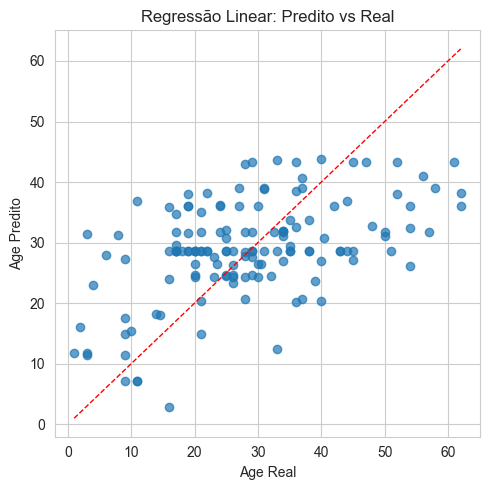

In [44]:
# Scatter de valores reais vs preditos
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_teste, predicoes, alpha=0.7)

# Linha de referência
lim_min = min(y_teste.min(), predicoes.min())
lim_max = max(y_teste.max(), predicoes.max())
ax.plot([lim_min, lim_max], [lim_min, lim_max], 'r--', linewidth=1)

ax.set_xlabel('Age Real')
ax.set_ylabel('Age Predito')
ax.set_title('Regressão Linear: Predito vs Real')
plt.tight_layout()
plt.show()

## 3. KNN (K-Nearest Neighbors)

Vamos agora avaliar KNN. Importante: para modelos baseados em distância NÃO é recomendado usar `drop='first'` no One-Hot Encoding. Motivos principais:
- Geometria: remover uma dummy cria dependência linear perfeita entre as restantes e distorce as distâncias entre categorias.
- Simetria: com todas as dummies, qualquer par de categorias distintas está à mesma distância; com drop, algumas combinações ficam artificialmente mais próximas.
- Sem multicolinearidade problemática: KNN não ajusta coeficientes, logo não sofre com a "armadilha das dummies" típica de regressão linear.

Portanto, refazemos o encoding especificamente para o KNN usando `drop=None`, mantendo todas as colunas. Primeiro criamos um baseline simples (k=5) com esse encoding completo. Em seguida usamos validação cruzada para otimizar hiperparâmetros (já implementado abaixo).

In [47]:
# 3.0 Baseline KNN (Parte 1) - Preparação e One-Hot completo
from sklearn.preprocessing import OneHotEncoder

# Reinicia lista de resultados para KNN (mantemos separado da regressão)
resultados_knn = []

print("=== KNN BASELINE: Preparação ===")
# Seleciona colunas categóricas e numéricas de dados_modelo
categoricas = dados_modelo[colunas_categoricas]
numericas = dados_modelo[colunas_numericas].values
print(f"Categóricas: {colunas_categoricas} | Numéricas: {colunas_numericas}")

# One-Hot completo (sem drop) para preservar simetria de distâncias
encoder_knn = OneHotEncoder(sparse_output=False, drop=None)
X_cat_knn = encoder_knn.fit_transform(categoricas)
nomes_cat_knn = encoder_knn.get_feature_names_out(colunas_categoricas).tolist()
print(f"Dummies criadas: {nomes_cat_knn}")

=== KNN BASELINE: Preparação ===
Categóricas: ['Sex', 'Embarked'] | Numéricas: ['Pclass', 'SibSp', 'Parch', 'Fare']
Dummies criadas: ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


#### Continuação: Concatenação e Split para o Baseline
Agora juntamos as features numéricas com todas as dummies e fazemos o split treino/teste (mesma semente para comparabilidade com a regressão).

In [48]:
# 3.0 Baseline KNN (Parte 2) - Concatenação e Split
import numpy as np
from sklearn.model_selection import train_test_split

X_full_knn = np.concatenate([numericas, X_cat_knn], axis=1)
nomes_features_knn = colunas_numericas + nomes_cat_knn

X_treino_knn, X_teste_knn, y_treino_knn, y_teste_knn = train_test_split(
    X_full_knn, y, test_size=0.2, random_state=42
)

print(f"Shape treino KNN: {X_treino_knn.shape} | teste: {X_teste_knn.shape}")
print('Total de features (KNN):', len(nomes_features_knn))

Shape treino KNN: (571, 9) | teste: (143, 9)
Total de features (KNN): 9


#### Continuação: Treinamento e Avaliação do Baseline
Com os dados separados, treinamos o KNN com k=5 e calculamos MAE e RMSE no teste.

In [49]:
# 3.0 Baseline KNN (Parte 3) - Treino, Predição e Métricas
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

knn_baseline = KNeighborsRegressor(n_neighbors=5)
knn_baseline.fit(X_treino_knn, y_treino_knn)
y_pred_knn_base = knn_baseline.predict(X_teste_knn)

mae_knn_base = mean_absolute_error(y_teste_knn, y_pred_knn_base)
rmse_knn_base = np.sqrt(mean_squared_error(y_teste_knn, y_pred_knn_base))

resultados_knn.append({
    'Experimento': 'KNN 1 - k=5 (One-Hot completo)',
    'Features': X_treino_knn.shape[1],
    'MAE': mae_knn_base,
    'RMSE': rmse_knn_base
})
print(f"KNN 1 - k=5 (One-Hot completo): MAE={mae_knn_base:.2f} | RMSE={rmse_knn_base:.2f}")

KNN 1 - k=5 (One-Hot completo): MAE=10.01 | RMSE=12.54


### 3.0a Escalonamento (StandardScaler) antes da Validação Cruzada

Por que escalar?
- KNN usa distâncias; variáveis em escalas maiores dominam a distância.

Principais estratégias:
- StandardScaler: centraliza (média=0) e escala pela variância (desvio padrão=1). Mantém forma de distribuições não muito enviesadas.
- MinMaxScaler: mapeia para intervalo [0,1]; sensível a outliers (um único valor extremo comprime o resto).
- RobustScaler: usa mediana e IQR (intervalo interquartil); mais robusto a outliers, mas não garante limites fixos.

Escolha aqui: StandardScaler (equilíbrio entre simplicidade e eficácia). Mostramos o impacto antes de partir para a validação cruzada com pipeline (que também aplicará escalonamento internamente).

In [50]:
# 3.0a Escalonamento com StandardScaler no Baseline
from sklearn.preprocessing import StandardScaler

# Ajusta o scaler usando apenas o treino (evita vazamento)
scaler_std = StandardScaler()
X_treino_knn_std = scaler_std.fit_transform(X_treino_knn)
X_teste_knn_std = scaler_std.transform(X_teste_knn)

knn_std = KNeighborsRegressor(n_neighbors=5)
knn_std.fit(X_treino_knn_std, y_treino_knn)
y_pred_std = knn_std.predict(X_teste_knn_std)

mae_std = mean_absolute_error(y_teste_knn, y_pred_std)
rmse_std = np.sqrt(mean_squared_error(y_teste_knn, y_pred_std))

resultados_knn.append({
    'Experimento': 'KNN 2 - k=5 + StandardScaler',
    'Features': X_treino_knn.shape[1],
    'MAE': mae_std,
    'RMSE': rmse_std
})
print(f"KNN 2 - k=5 + StandardScaler: MAE={mae_std:.2f} | RMSE={rmse_std:.2f}")

KNN 2 - k=5 + StandardScaler: MAE=9.21 | RMSE=11.79


### 3.1 Por que Validação Cruzada no KNN?

Até aqui avaliamos um baseline (hold-out). Porém:
- Um único split pode dar sorte ou azar.
- Precisamos comparar sistematicamente várias combinações de hiperparâmetros.
- KNN é sensível: (a) escolha de k, (b) métrica de distância, (c) pesos, (d) subconjunto de features.

Validação Cruzada (K-Fold) divide o treino em K partes; cada parte vira validação uma vez. A média das métricas reduz variância e dá estimativa mais robusta.

Usaremos um Pipeline + GridSearchCV para:
1. Escalonar (StandardScaler) dentro de cada fold (evita vazamento).
2. Selecionar número de features (SelectKBest com f_regression).
3. Testar múltiplos valores de k, métricas de distância e esquema de pesos.

Próximas células: montar pipeline, definir grade, executar busca e interpretar resultados.

In [51]:
# Montagem do Pipeline e da Grade de Hiperparâmetros para KNN
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, KFold

# Pipeline:
# 1. scale: StandardScaler (normaliza escala)
# 2. select: SelectKBest (escolhe as K melhores features segundo f_regression)
# 3. knn: KNeighborsRegressor
pipeline_knn = Pipeline([
    ('scale', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('knn', KNeighborsRegressor())
])

# Definição da grade de busca (limitada para fins didáticos)
param_grid = {
    'select__k': [3, 4, 5, 'all'],                    # N de features
    'knn__n_neighbors': [3, 5, 7, 9],                 # valores de k
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  # métricas base
    'knn__p': [1, 2],                                 # só afeta minkowski
    'knn__weights': ['uniform', 'distance']           # ponderação
}

# Configuração da validação cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

print('Pipeline e grade preparados. Próxima célula: executar GridSearchCV.')

Pipeline e grade preparados. Próxima célula: executar GridSearchCV.


### 3.2 Execução do GridSearchCV

Agora executamos o GridSearchCV:
- scoring: RMSE (usamos 'neg_root_mean_squared_error' porque o sklearn maximiza a métrica; valores mais próximos de 0 e menos negativos são melhores)
- cv: 5 folds
- n_jobs=-1 para paralelizar (se disponível)

Irá testar todas as combinações definidas na grade. Guardaremos resultados em `cv_results_` para análise.

In [52]:
# Execução do GridSearchCV
scoring = 'neg_root_mean_squared_error'
grid = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print('Iniciando busca em grade...')
grid.fit(X_treino, y_treino)
print('Busca concluída.')

# Converter resultados em DataFrame ordenado por média do RMSE (invertendo o sinal)
import pandas as pd
cv_df = pd.DataFrame(grid.cv_results_)
cv_df['RMSE_mean'] = -cv_df['mean_test_score']
cv_df['RMSE_std'] = cv_df['std_test_score']
colunas_interesse = [
    'param_select__k','param_knn__n_neighbors','param_knn__metric','param_knn__p','param_knn__weights',
    'RMSE_mean','RMSE_std'
]
cv_top = cv_df[colunas_interesse].sort_values('RMSE_mean').head(10)
print('Top 10 combinações (ordenadas por RMSE médio CV):')
print(cv_top.reset_index(drop=True).round(4))

Iniciando busca em grade...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Busca concluída.
Top 10 combinações (ordenadas por RMSE médio CV):
  param_select__k  param_knn__n_neighbors param_knn__metric  param_knn__p  \
0               4                       9         euclidean             1   
1               4                       9         euclidean             2   
2               4                       9         minkowski             2   
3               4                       9         manhattan             2   
4               4                       9         minkowski             1   
5               4                       9         manhattan             1   
6               3                       7         manhattan             1   
7               3                       7         manhattan             2   
8               3                       7         minkowski             1   
9               3                       7         minkowski             

In [56]:
# Ranking Regressão Linear
print("=== RANKING REGRESSÃO LINEAR ===")
if resultados_regressao:
    df_reg = pd.DataFrame(resultados_regressao).sort_values('RMSE')
    print(df_reg.round(3))
else:
    print("Nenhum experimento de Regressão registrado.")

# Registrar melhor KNN (GridSearch) antes do ranking KNN
if 'grid' in globals():
    best_params = grid.best_params_
    best_rmse_cv = -grid.best_score_
    # Avaliar no conjunto de teste final (generalização fora da CV)
    best_model = grid.best_estimator_
    pred_best = best_model.predict(X_teste)
    mae_best = mean_absolute_error(y_teste, pred_best)
    rmse_best = np.sqrt(mean_squared_error(y_teste, pred_best))
    resultados_knn.append({
        'Experimento': 'KNN GridSearch BEST',
        'Features': X_treino.shape[1],
        'MAE': mae_best,
        'RMSE': rmse_best
    })
    print(f"\nMelhor KNN (CV): params={best_params} | RMSE_CV={best_rmse_cv:.3f} | RMSE_TESTE={rmse_best:.3f} | MAE_TESTE={mae_best:.3f}")
else:
    print('\nGridSearch ainda não executado.')

=== RANKING REGRESSÃO LINEAR ===
                                     Experimento  Features   MAE    RMSE
0  RL 1 - Linear Regression (One-Hot drop first)         7  9.53  11.762

Melhor KNN (CV): params={'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform', 'select__k': 4} | RMSE_CV=12.674 | RMSE_TESTE=11.606 | MAE_TESTE=9.235


In [54]:
# Ranking KNN
print("\n=== RANKING KNN ===")
if resultados_knn:
    df_knn = pd.DataFrame(resultados_knn).sort_values('RMSE')
    print(df_knn.round(3))
else:
    print("Nenhum experimento de KNN registrado.")


=== RANKING KNN ===
                      Experimento  Features     MAE    RMSE
2             KNN GridSearch BEST         7   9.235  11.606
1    KNN 2 - k=5 + StandardScaler         9   9.210  11.792
0  KNN 1 - k=5 (One-Hot completo)         9  10.014  12.539


### 3.3 Interpretação dos Resultados da Busca

Elementos para observar:
- `RMSE_mean` e seu `RMSE_std`: estabilidade entre folds (quanto menor o desvio, mais consistente).
- Métrica de distância vencedora e pesos (`uniform` vs `distance`).
- Valor de `k` menor ou maior: trade-off viés vs variância.
- Número de features (`select__k`): remover ruído pode ajudar KNN.

Em seguida registramos o melhor modelo e mostramos o ranking consolidado.

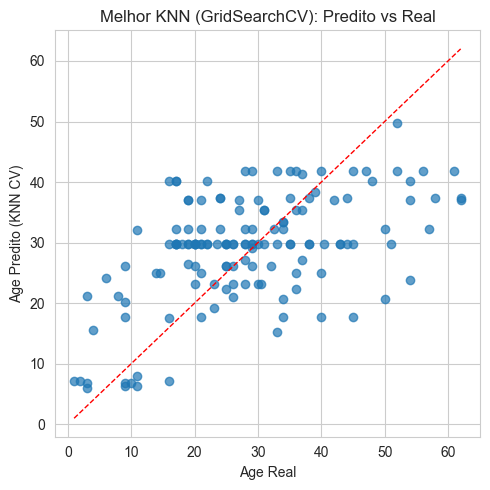

In [55]:
# 3.4 Melhor KNN: Predito vs Real (Teste)
if 'grid' in globals():
    best_model = grid.best_estimator_
    pred_best = best_model.predict(X_teste)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(y_teste, pred_best, alpha=0.7)
    lim_min = min(y_teste.min(), pred_best.min())
    lim_max = max(y_teste.max(), pred_best.max())
    ax.plot([lim_min, lim_max], [lim_min, lim_max], 'r--', linewidth=1)
    ax.set_xlabel('Age Real')
    ax.set_ylabel('Age Predito (KNN CV)')
    ax.set_title('Melhor KNN (GridSearchCV): Predito vs Real')
    plt.tight_layout()
    plt.show()
else:
    print('GridSearch ainda não executado; rode as células anteriores.')

## 4. Random Forest Regressor

Agora incluímos um modelo de árvore em conjunto (Random Forest) para prever `Age`.

Por que considerar Random Forest?
- Captura relações não lineares e interações entre variáveis automaticamente.
- Robusto a outliers e a colinearidade entre features (menos sensível que Regressão Linear).
- Não exige escalonamento (árvores particionam por limiares, não por distância).

Fluxo nesta seção:
1. Definir grade enxuta de hiperparâmetros (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`).
2. Rodar `GridSearchCV` com 5-fold (mesma métrica: RMSE via `neg_root_mean_squared_error`).
3. Registrar melhor modelo no ranking de Regressão (reutilizando `resultados_regressao`).
4. Plotar Predito vs Real para o melhor Random Forest.

Observação: Reaproveitamos `X_treino`, `X_teste`, `y_treino`, `y_teste` já criados para a Regressão Linear (codificação one-hot com `drop='first'`).

In [57]:
# 4.1 GridSearchCV para RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Grade enxuta (didática) - pode ser expandida depois
param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

cv_rf = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

scoring = 'neg_root_mean_squared_error'
print('Iniciando GridSearchCV para RandomForest...')
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring=scoring,
    cv=cv_rf,
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_treino, y_treino)
print('Concluído.')

import pandas as pd
rf_cv_df = pd.DataFrame(rf_grid.cv_results_)
rf_cv_df['RMSE_mean'] = -rf_cv_df['mean_test_score']
rf_cv_df['RMSE_std'] = rf_cv_df['std_test_score']
cols = [
    'param_n_estimators','param_max_depth','param_min_samples_split',
    'param_min_samples_leaf','param_max_features','RMSE_mean','RMSE_std'
]
print('\nTop 8 combinações (ordenadas por RMSE médio CV):')
print(rf_cv_df[cols].sort_values('RMSE_mean').head(8).reset_index(drop=True).round(4))

best_params_rf = rf_grid.best_params_
best_rmse_cv_rf = -rf_grid.best_score_
print(f"\nMelhores parâmetros RF: {best_params_rf} | RMSE_CV={best_rmse_cv_rf:.3f}")

Iniciando GridSearchCV para RandomForest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Concluído.

Top 8 combinações (ordenadas por RMSE médio CV):
   param_n_estimators param_max_depth  param_min_samples_split  \
0                 100               5                        5   
1                 100               5                        5   
2                 100               5                        5   
3                 100               5                        5   
4                 100               5                        2   
5                 100               5                        2   
6                 100               5                        2   
7                 100               5                        2   

   param_min_samples_leaf param_max_features  RMSE_mean  RMSE_std  
0                       1               log2    12.3846    0.5800  
1                       1               sqrt    12.3846    0.5800  
2                       2         

RandomForest BEST: MAE=9.066 | RMSE=11.214 (RMSE_CV=12.385)

=== RANKING REGRESSÃO (LR + RF) ===
                                     Experimento  Features    MAE    RMSE
1                         RF 1 - GridSearch BEST         7  9.066  11.214
0  RL 1 - Linear Regression (One-Hot drop first)         7  9.530  11.762


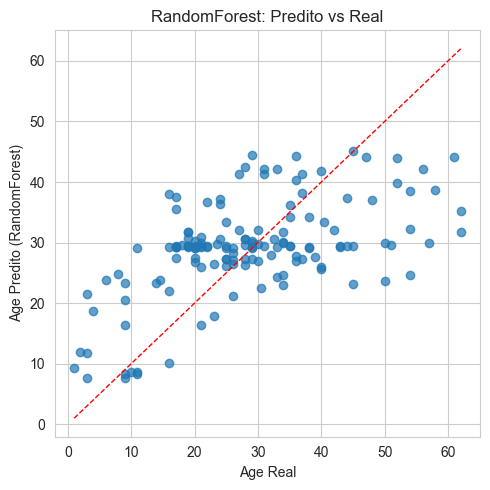

In [58]:
# 4.2 Avaliação do Melhor RandomForest e Registro
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predição no conjunto de teste
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_teste)
mae_rf = mean_absolute_error(y_teste, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_teste, rf_pred))

# Registrar nos resultados de regressão (mesmo ranking da Linear)
resultados_regressao.append({
    'Experimento': 'RF 1 - GridSearch BEST',
    'Features': X_treino.shape[1],
    'MAE': mae_rf,
    'RMSE': rmse_rf
})

print(f"RandomForest BEST: MAE={mae_rf:.3f} | RMSE={rmse_rf:.3f} (RMSE_CV={best_rmse_cv_rf:.3f})")

# Ranking atualizado
print("\n=== RANKING REGRESSÃO (LR + RF) ===")
import pandas as pd
print(pd.DataFrame(resultados_regressao).sort_values('RMSE').round(3))

# Gráfico Predito vs Real
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_teste, rf_pred, alpha=0.7)
lim_min = min(y_teste.min(), rf_pred.min())
lim_max = max(y_teste.max(), rf_pred.max())
ax.plot([lim_min, lim_max], [lim_min, lim_max], 'r--', linewidth=1)
ax.set_xlabel('Age Real')
ax.set_ylabel('Age Predito (RandomForest)')
ax.set_title('RandomForest: Predito vs Real')
plt.tight_layout()
plt.show()